<a href="https://colab.research.google.com/github/fabienne-lab/CSI-4142/blob/main/ProjetCSI4142.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required packages
import pandas as pd
import seaborn as sns
import numpy as np


# Data loading

In [ ]:
!gdown 1HLiXcB65wyen1c5tgFiwxJLJng283XMh

In [ ]:
#loading dataset
df=pd.read_csv('eda_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


# Data cleaning and transformation

##### Columns removing
Let's remove irrelevant column for our analysis. 

In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [ ]:
df = df.drop(columns = ["Unnamed: 0","Headquarters","Sector","age","Salary Estimate","Job Description","hourly","employer_provided","company_txt","job_state","Competitors","same_state","python_yn","R_yn","spark","aws","excel","seniority","desc_len","num_comp"])
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research\r\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4\r\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL\r\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions\r\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [ ]:
#Number of rows
len(df.index)

742

### Checking for null or missing values

In [ ]:
# Transform data by removing the "\n" in certain columns
df = df.replace("\n", " ", regex = True)
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research\r 3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\r 3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4\r 4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL\r 3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions\r 2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [ ]:
# Transform data by removing the "\r" in certain columns
df = df.replace("\r", " ", regex = True)
df.head()

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
0,Data Scientist,3.8,Tecolote Research 3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist
2,Data Scientist,4.8,KnowBe4 4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist
3,Data Scientist,3.8,PNNL 3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist
4,Data Scientist,2.9,Affinity Solutions 2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist


In [ ]:
df.isnull().sum()

Job Title            0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_simp             0
dtype: int64

In [ ]:
df.isna().sum()

Job Title            0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_simp             0
dtype: int64

In [ ]:
(df == "na").sum()

Job Title              0
Rating                 0
Company Name           0
Location               0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Revenue                0
min_salary             0
max_salary             0
avg_salary             0
job_simp             184
dtype: int64

There is some missing values in the job name simplification column (the last one).

Let's check what are the values in that column

In [ ]:
df["job_simp"].unique()

array(['data scientist', 'na', 'analyst', 'data engineer', 'director',
       'manager', 'mle'], dtype=object)

In [ ]:
df[(df["job_simp"] == "na")]

,Job Title,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Revenue,min_salary,max_salary,avg_salary,job_simp
8,Research Scientist,3.3,Rochester Regional Health 3.3,"Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,$500 million to $1 billion (USD),38,84,61.0,na
16,"Scientist I/II, Biology",3.9,Blueprint Medicines 3.9,"Cambridge, MA",51 to 200 employees,2011,Company - Public,Biotech & Pharmaceuticals,$1 to $5 million (USD),67,137,102.0,na
43,Scientist,3.4,Edgewell Personal Care 3.4,"Allendale, NJ",5001 to 10000 employees,2015,Company - Public,Consumer Products Manufacturing,$2 to $5 billion (USD),52,113,82.5,na
48,Spectral Scientist/Engineer,4.7,Centauri 4.7,"Beavercreek, OH",501 to 1000 employees,1999,Company - Private,Aerospace & Defense,$100 to $500 million (USD),56,117,86.5,na
69,R&D Data Analysis Scientist,4.0,HP Inc. 4.0,"Vancouver, WA",10000+ employees,1939,Company - Public,Computer Hardware & Software,Unknown / Non-Applicable,65,130,97.5,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,"Research Scientist, Immunology - Cancer Biology",-1.0,Kronos Bio,"Cambridge, MA",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable,100,140,120.0,na
736,"Principal, Data Science - Advanced Analytics",3.6,IQVIA 3.6,"Plymouth Meeting, PA",10000+ employees,2017,Company - Public,Biotech & Pharmaceuticals,$2 to $5 billion (USD),86,137,111.5,na
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,"Cambridge, MA",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,na
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,"Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,na


As we can see, the most kind of data scientist job classified as "na" cannot be consider fully as data scientist jobs. In fact we got some "project scientist", "Senior scientist-neuroscience". Even if they contain some data scientist jobs, We will classify them as "Researcher".

For our analysis, we're gonna remove these kind of jobs from the dataset.

In [ ]:
# Remove the job_simp "na" rows from the dataset
for i in range(len(df)) :
  if(df.loc[i,"job_simp"] == "na") :
    df.loc[i,"job_simp"] = "research"

In [ ]:
df["job_simp"].unique()

array(['data scientist', 'research', 'analyst', 'data engineer',
       'director', 'manager', 'mle'], dtype=object)

Renaming some columns

In [ ]:
df = df.rename({'Location' : 'city','job_simp' : 'job_classification','Rating' : 'rating','Size':'size_range',
               'Type of ownership' : 'type_of_ownership','Industry':'industry','Company Name' : 'company_name'},axis = 1)

In [ ]:
temp_1 = df["city"].str.split(",", n = 1, expand = True)
df["city"] = temp_1[0]
df["city_state"] = temp_1[1]

In [ ]:
df.loc[df['city_state'] == ' Los Angeles, CA', 'city_state'] = ' CA'

In [ ]:
df

,Job Title,rating,company_name,city,size_range,Founded,type_of_ownership,industry,Revenue,min_salary,max_salary,avg_salary,job_classification,city_state
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,data scientist,NM
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,$2 to $5 billion (USD),63,112,87.5,data scientist,MD
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,$100 to $500 million (USD),80,90,85.0,data scientist,FL
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,1965,Government,Energy,$500 million to $1 billion (USD),56,97,76.5,data scientist,WA
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,86,143,114.5,data scientist,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,$10+ billion (USD),58,111,84.5,research,MA
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,2006,Company - Public,Internet,$100 to $500 million (USD),72,133,102.5,data engineer,TN
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,1984,College / University,Colleges & Universities,Unknown / Non-Applicable,56,91,73.5,research,PA
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,$5 to $10 million (USD),95,160,127.5,manager,PA


It could be interesting to keep the "Revenue" and the "Founded" columns for our analysis, but there is a lot of missing values or inconsistant values in both of theses columns. So, as they are not mandatory for the analysis, we are going to remove them.

In [ ]:
df[df["Revenue"].str.contains("Unknown")].index

Index([  4,   6,  13,  15,  17,  18,  20,  21,  22,  34,
       ...
       709, 712, 716, 724, 728, 729, 730, 732, 733, 739],
      dtype='int64', length=203)

In [ ]:
df[df["Founded"]<0].index

Index([ 41,  45,  68, 141, 162, 186, 189, 198, 222, 230, 256, 264, 300, 305,
       307, 339, 341, 370, 373, 400, 404, 412, 438, 449, 451, 452, 456, 458,
       465, 493, 501, 511, 551, 559, 560, 575, 581, 598, 603, 609, 620, 641,
       658, 668, 675, 683, 700, 714, 730, 740],
      dtype='int64')

In [ ]:
df = df.drop(columns = ["Founded","Revenue"])

In [ ]:
drop_index1 = df.loc[df["size_range"] == "-1"].index

In [ ]:
drop_index1

Index([581], dtype='int64')

In [ ]:
df = df.drop(index = drop_index1)


In [ ]:
drop_index2 = df.loc[df["industry"] == "-1"].index

In [ ]:
df = df.drop(drop_index2)

In [ ]:
drop_index3 = df.loc[df["size_range"]=="Unknown"].index

In [ ]:
df = df.drop(drop_index3)

In [ ]:
drop_index4 = df.loc[df["rating"] == -1].index

In [ ]:
df = df.drop(drop_index4)

In [ ]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY
...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,Company - Public,Biotech & Pharmaceuticals,58,111,84.5,research,MA
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,Company - Public,Internet,72,133,102.5,data engineer,TN
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,College / University,Colleges & Universities,56,91,73.5,research,PA
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,Company - Private,Staffing & Outsourcing,95,160,127.5,manager,PA


Transform company size dat

In [ ]:
Lower_bound= df['size_range'].str.extract('(\d+)')
Upper_bound = df['size_range'].str.extract('(\d+)').shift(-1).fillna(10000)

# convert lower and upper bounds to integers
Lower_bound = Lower_bound.astype(int)
Upper_bound= Upper_bound.astype(int)

# create cut points for the Employee_Range column
cut_points = [0,49, 200, 500, 1000, 5000,10000,20000]

# apply the pd.cut() function to the Employee_Range column
df['Size'] = pd.cut(Lower_bound[0], cut_points, labels=['<50', '51-200','201-500','501-1000','1001-5000','5001-10000','10000+'])

In [ ]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,GSK 3.9,Cambridge,10000+ employees,Company - Public,Biotech & Pharmaceuticals,58,111,84.5,research,MA,5001-10000
738,Senior Data Engineer,4.4,Eventbrite 4.4,Nashville,1001 to 5000 employees,Company - Public,Internet,72,133,102.5,data engineer,TN,1001-5000
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,Software Engineering Institute 2.6,Pittsburgh,501 to 1000 employees,College / University,Colleges & Universities,56,91,73.5,research,PA,501-1000
740,Data Science Manager,3.2,"Numeric, LLC 3.2",Allentown,1 to 50 employees,Company - Private,Staffing & Outsourcing,95,160,127.5,manager,PA,<50


# Checking for duplicates

In [ ]:
duplicates = df.drop_duplicates()

In [ ]:
duplicates

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50


In [ ]:
df = duplicates

In [ ]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50


# Generate surrogate keys

In [ ]:
df["id"] = range(1,len(df)+1)

C:\Users\wilfr\AppData\Local\Temp\ipykernel_2716\436787494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = range(1,len(df)+1)


In [ ]:
df

,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size,id
0,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000,2
2,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000,3
3,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000,4
4,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000,454
700,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200,455
716,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000,456
732,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50,457


In [ ]:
df = df.reindex(columns = ["id"] + list([c for c in df.columns if c!= 'Surrogate Keys']))

In [ ]:
df

,id,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,Size,id
0,1,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,501-1000,1
1,2,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,5001-10000,2
2,3,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,501-1000,3
3,4,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,1001-5000,4
4,5,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,51-200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,454,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,1001-5000,454
700,455,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,51-200,455
716,456,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,501-1000,456
732,457,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,<50,457


In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df = df.drop(columns = ["Size"])

In [ ]:
df

,id,Job Title,rating,company_name,city,size_range,type_of_ownership,industry,min_salary,max_salary,avg_salary,job_classification,city_state,id
0,1,Data Scientist,3.8,Tecolote Research 3.8,Albuquerque,501 to 1000 employees,Company - Private,Aerospace & Defense,53,91,72.0,data scientist,NM,1
1,2,Healthcare Data Scientist,3.4,University of Maryland Medical System 3.4,Linthicum,10000+ employees,Other Organization,Health Care Services & Hospitals,63,112,87.5,data scientist,MD,2
2,3,Data Scientist,4.8,KnowBe4 4.8,Clearwater,501 to 1000 employees,Company - Private,Security Services,80,90,85.0,data scientist,FL,3
3,4,Data Scientist,3.8,PNNL 3.8,Richland,1001 to 5000 employees,Government,Energy,56,97,76.5,data scientist,WA,4
4,5,Data Scientist,2.9,Affinity Solutions 2.9,New York,51 to 200 employees,Company - Private,Advertising & Marketing,86,143,114.5,data scientist,NY,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,Data Architect / Data Modeler,4.3,Medidata Solutions 4.3,New York,1001 to 5000 employees,Company - Public,Enterprise Software & Network Solutions,63,110,86.5,research,NY,454
454,455,Data Scientist,3.4,"DatamanUSA, LLC 3.4",Olympia,51 to 200 employees,Company - Private,IT Services,65,113,89.0,data scientist,WA,455
455,456,"Associate Scientist / Sr. Associate Scientist,...",4.0,23andMe 4.0,South San Francisco,501 to 1000 employees,Company - Private,Biotech & Pharmaceuticals,59,125,92.0,research,CA,456
456,457,Machine Learning Engineer (NLP),4.1,CK-12 Foundation 4.1,Palo Alto,1 to 50 employees,Company - Private,K-12 Education,80,142,111.0,mle,CA,457


# Load the file

In [ ]:
#df.to_csv('Stagged_data.csv', index = False)

# Data preprocessing

## Data summarization

In [ ]:
import matplotlib.pyplot as plt

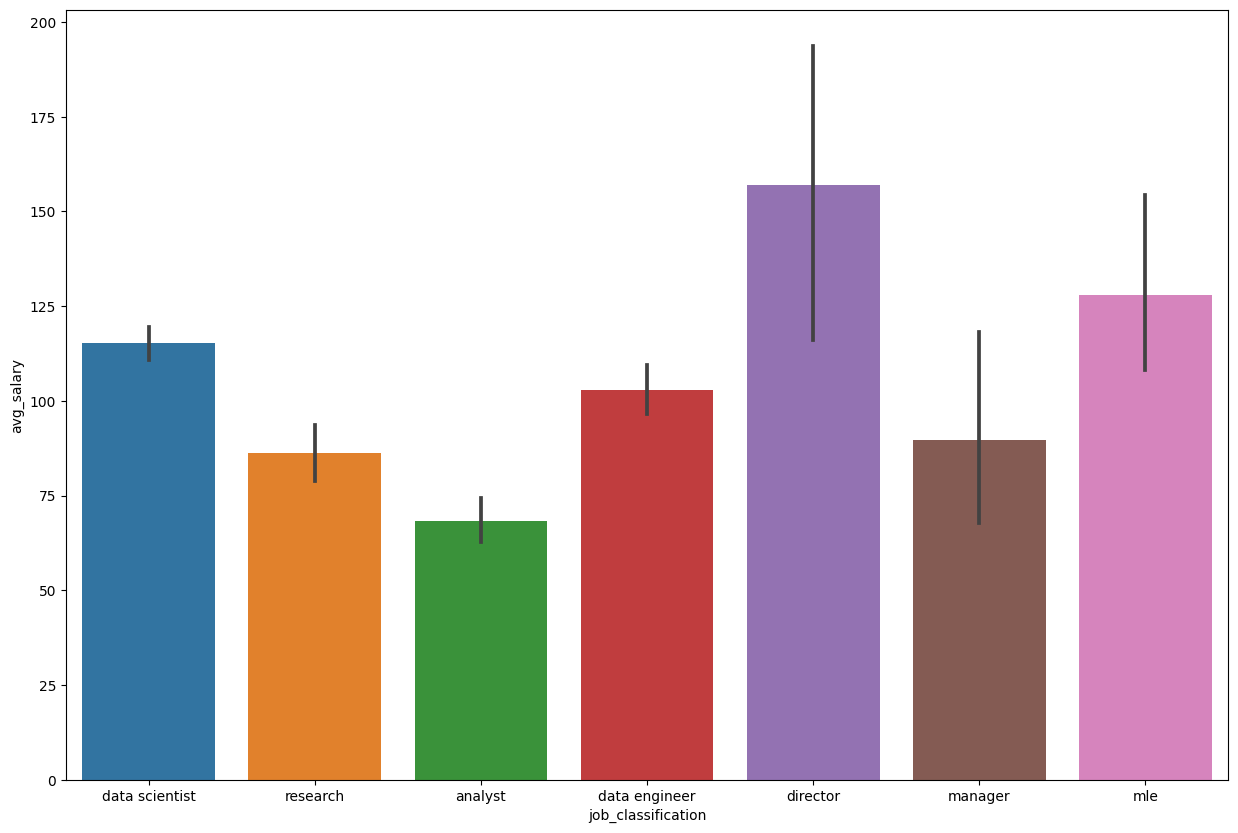

In [ ]:
# Barplot of the job_calssification according to average salary

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x = "job_classification",y="avg_salary",data = df,ax = ax)

plt.title ='Barplot of job_classification according to average salary'
plt.xlabel = "Job Classification"
plt.ylabel ="Average Salary"
plt.show()

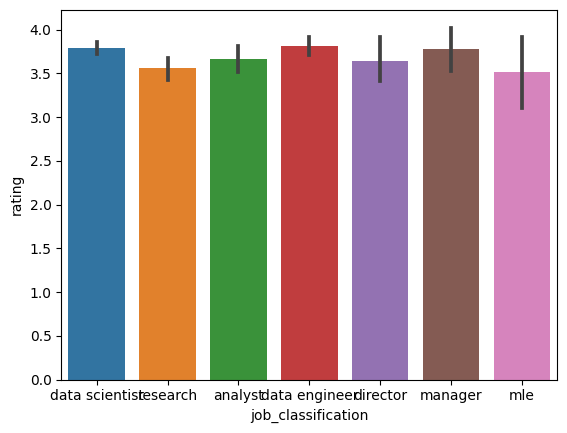

In [ ]:
# Scatter plot according the ranking


sns.barplot(x = "job_classification", y="rating",data =df)

plt.xlabel = "job_classification"
plt.ylabel = "rating"
plt.title = "job_classification according company ranking"

plt.show()


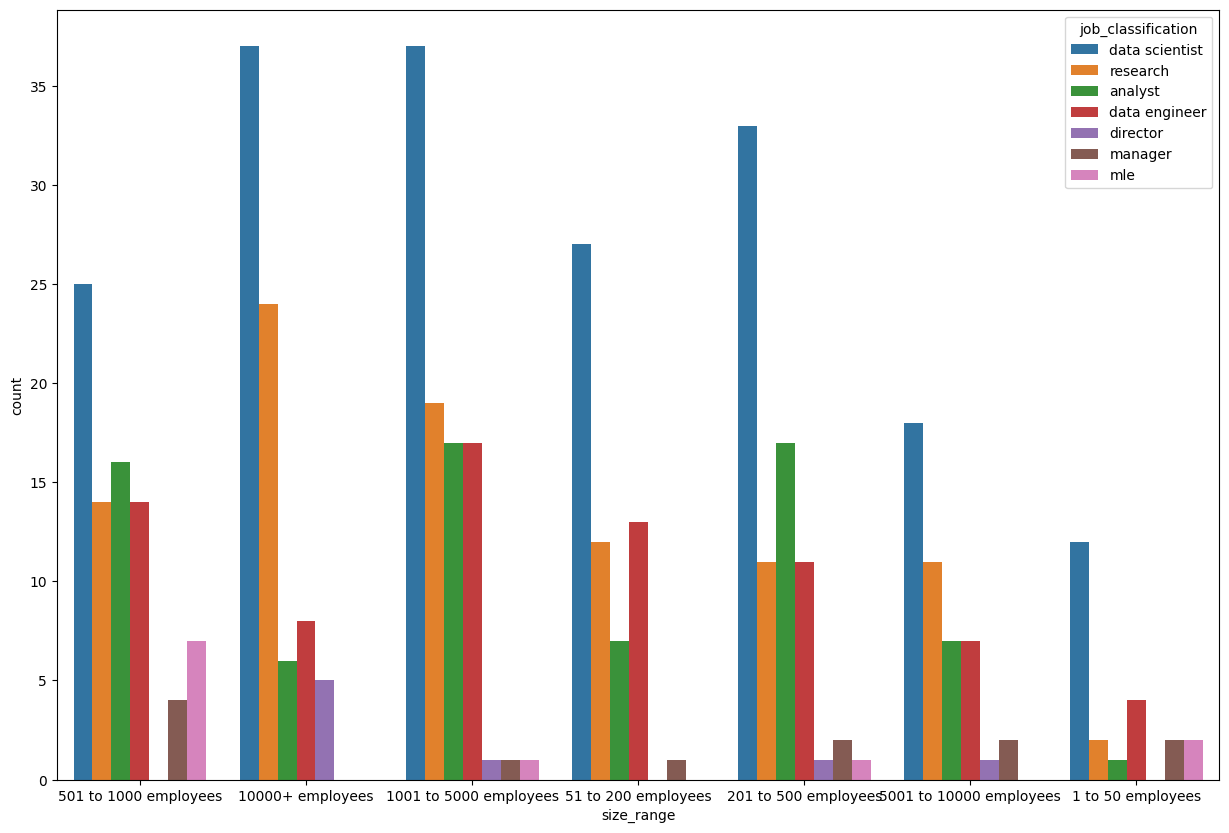

In [ ]:
# countplot of the job classification according to company size

fig, ax = plt.subplots(figsize=(15, 10))

sns.countplot(x="size_range",hue = "job_classification",data = df,ax = ax)


In [ ]:
df["industry"].unique()

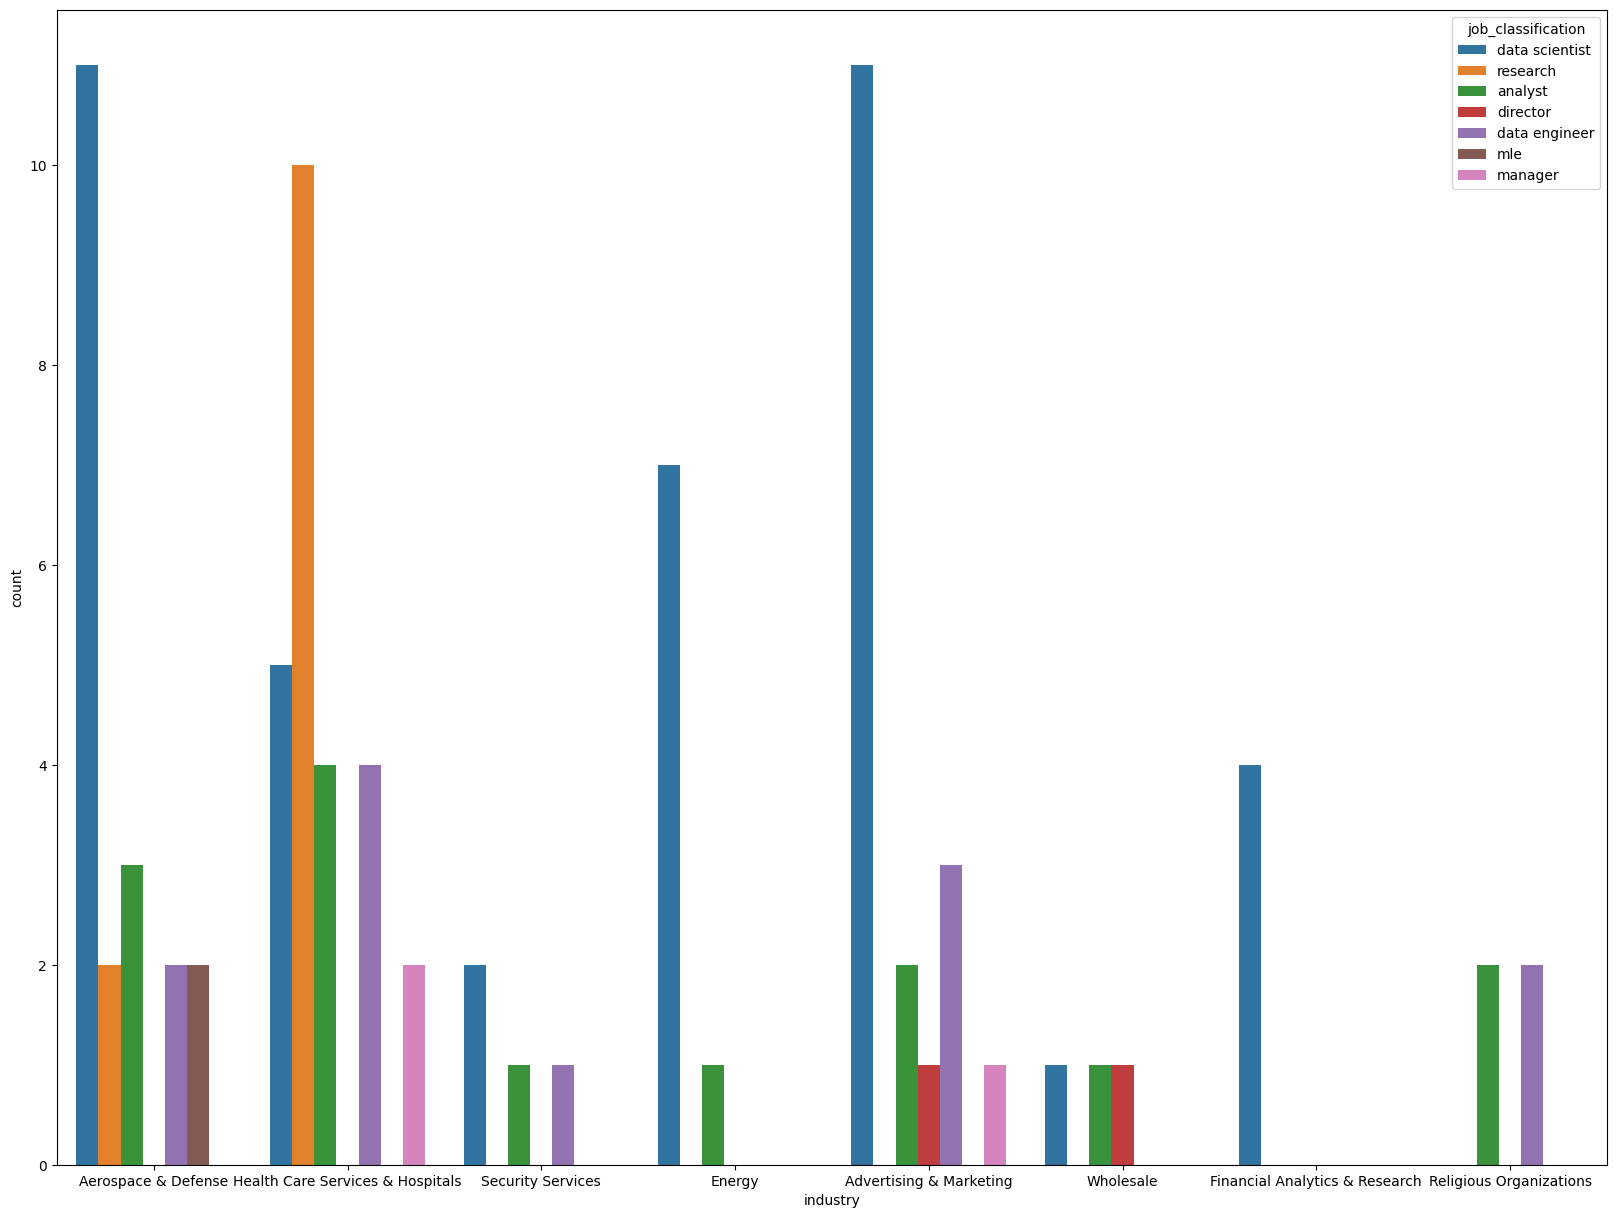

In [ ]:
# countplot  according the industry
fig, ax = plt.subplots(figsize=(20, 15))

industry_filter_1 = df[(df['industry'] == 'Health Care Services & Hospitals') | (df['industry'] == 'Aerospace & Defense')
                      | (df['industry'] == 'Security Services')
                      | (df['industry'] == 'Energy')
                      | (df['industry'] == 'Advertising & Marketing')
                      | (df['industry'] == 'Wholesale')
                      | (df['industry'] == 'Financial Analytics & Research')
                      | (df['industry'] == 'Religious Organizations')]

sns.countplot(x = "industry", hue = "job_classification",data =industry_filter_1)


In [ ]:
df["city_state"].unique()

<Axes: xlabel='city_state', ylabel='count'>

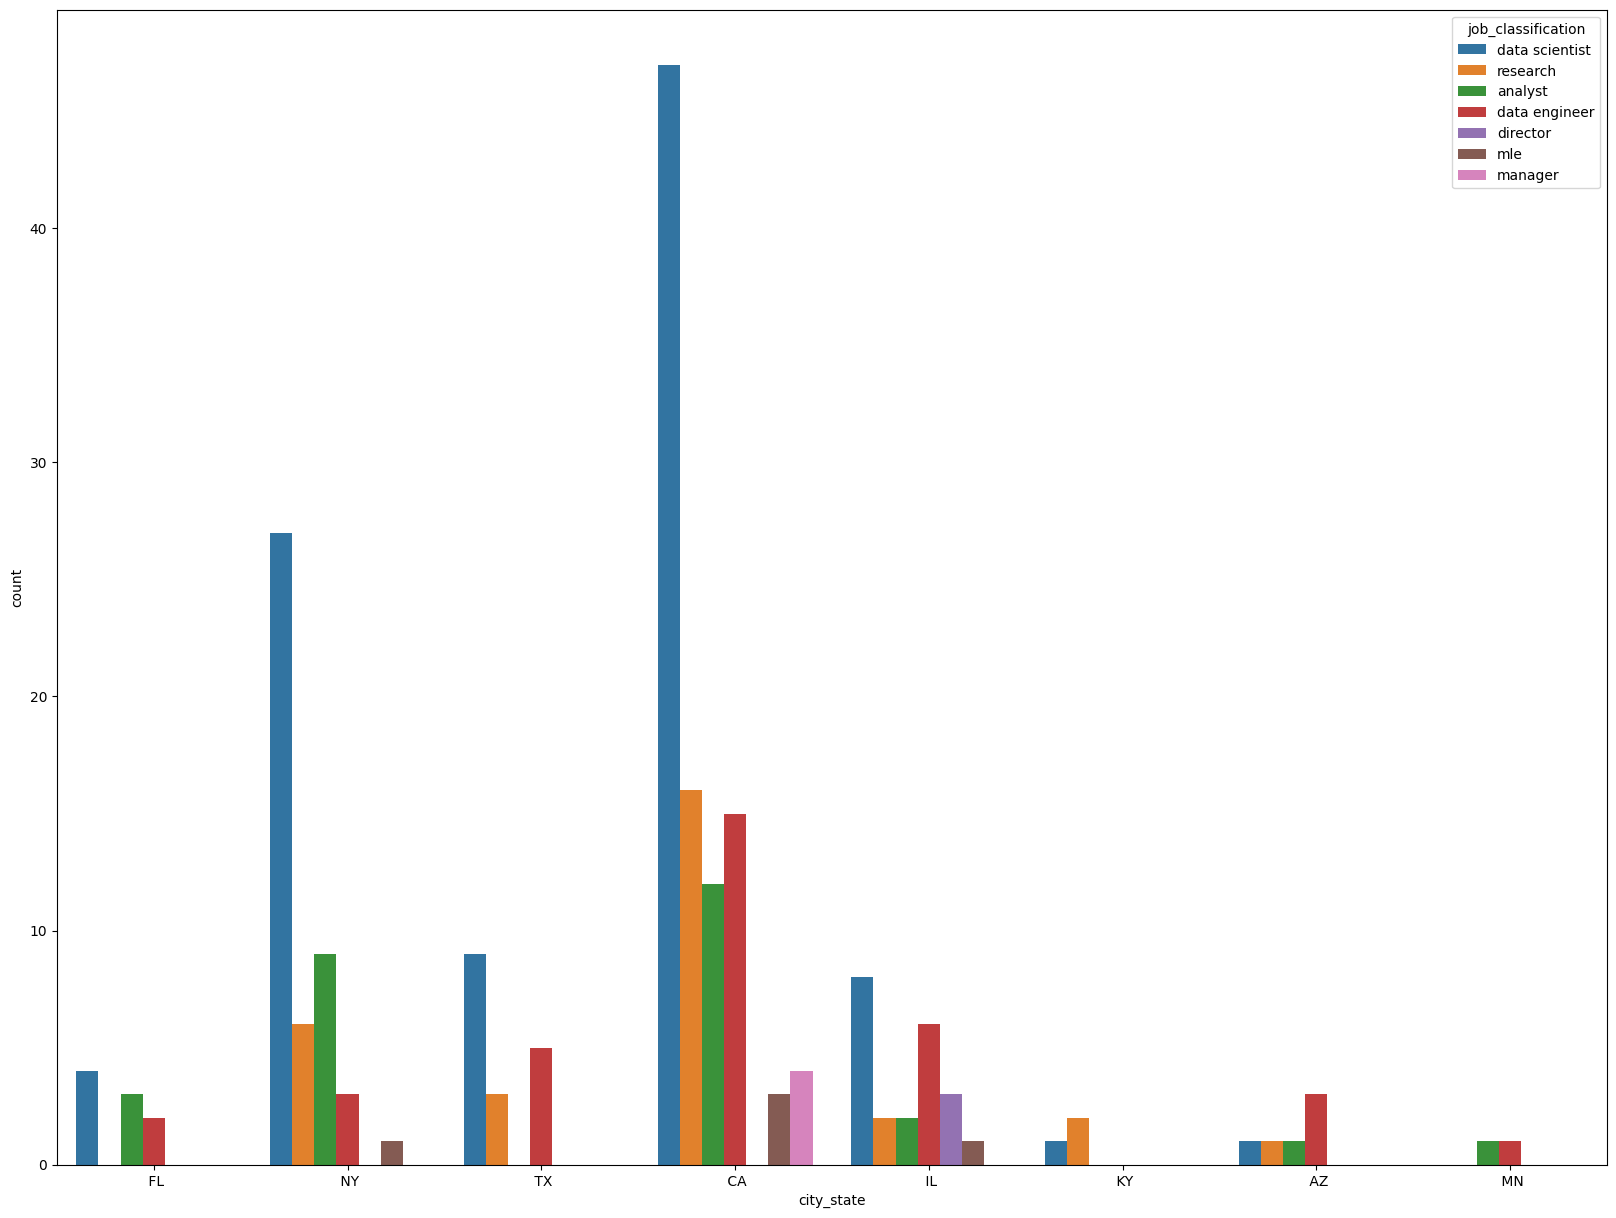

In [ ]:
# Countplot plot according the state
fig, ax = plt.subplots(figsize=(20, 15))

state_filter_1 = df[(df['city_state'] == ' CA') | (df['city_state'] == ' NY')
                      | (df['city_state'] == ' IL')
                      | (df['city_state'] == ' AZ')
                      | (df['city_state'] ==  ' KY')
                      | (df['city_state'] == ' MN' )
                      | (df['city_state'] == ' TX')
                      | (df['city_state'] == ' FL')]

sns.countplot(x = "city_state", hue="job_classification",data =state_filter_1)



In [ ]:
df["type_of_ownership"].unique()

<Axes: xlabel='type_of_ownership', ylabel='count'>

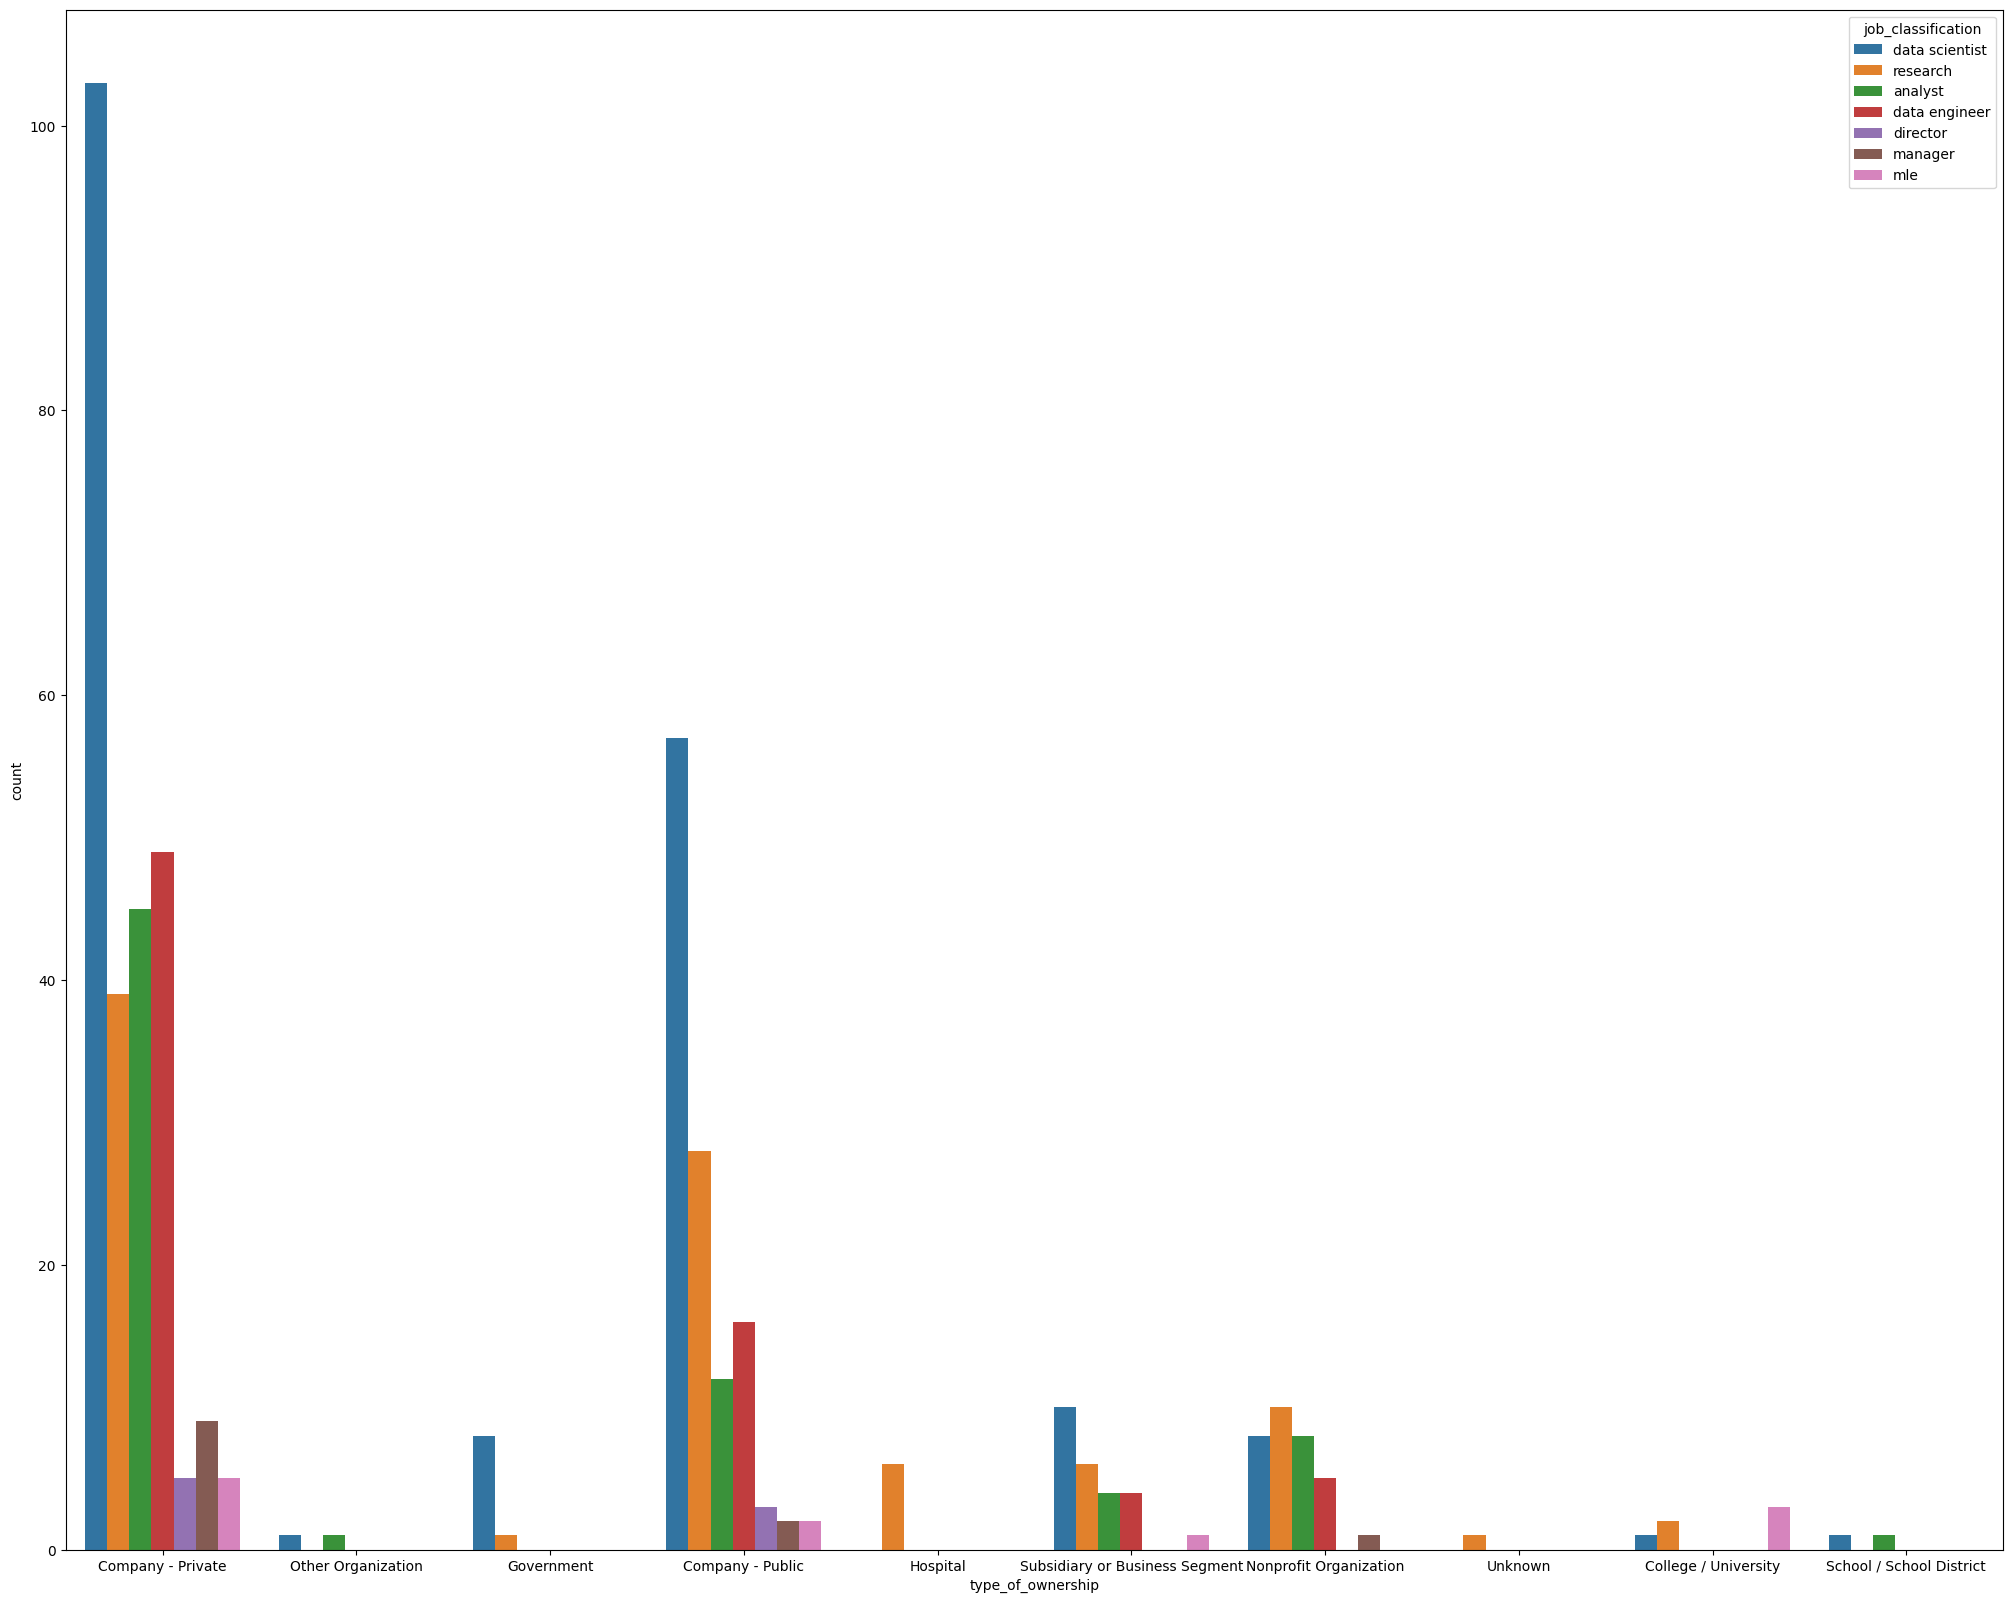

In [ ]:
# Countplot according the type of ownership
fig, ax = plt.subplots(figsize=(25, 20))



sns.countplot(x = "type_of_ownership", hue="job_classification",data =df)



In [ ]:
value_counts = df["company_name"].value_counts()

filtered_df = df[df['company_name'].isin(value_counts.index[value_counts > 3])]

filtered_df['company_name'].unique()

<Axes: xlabel='company_name', ylabel='count'>

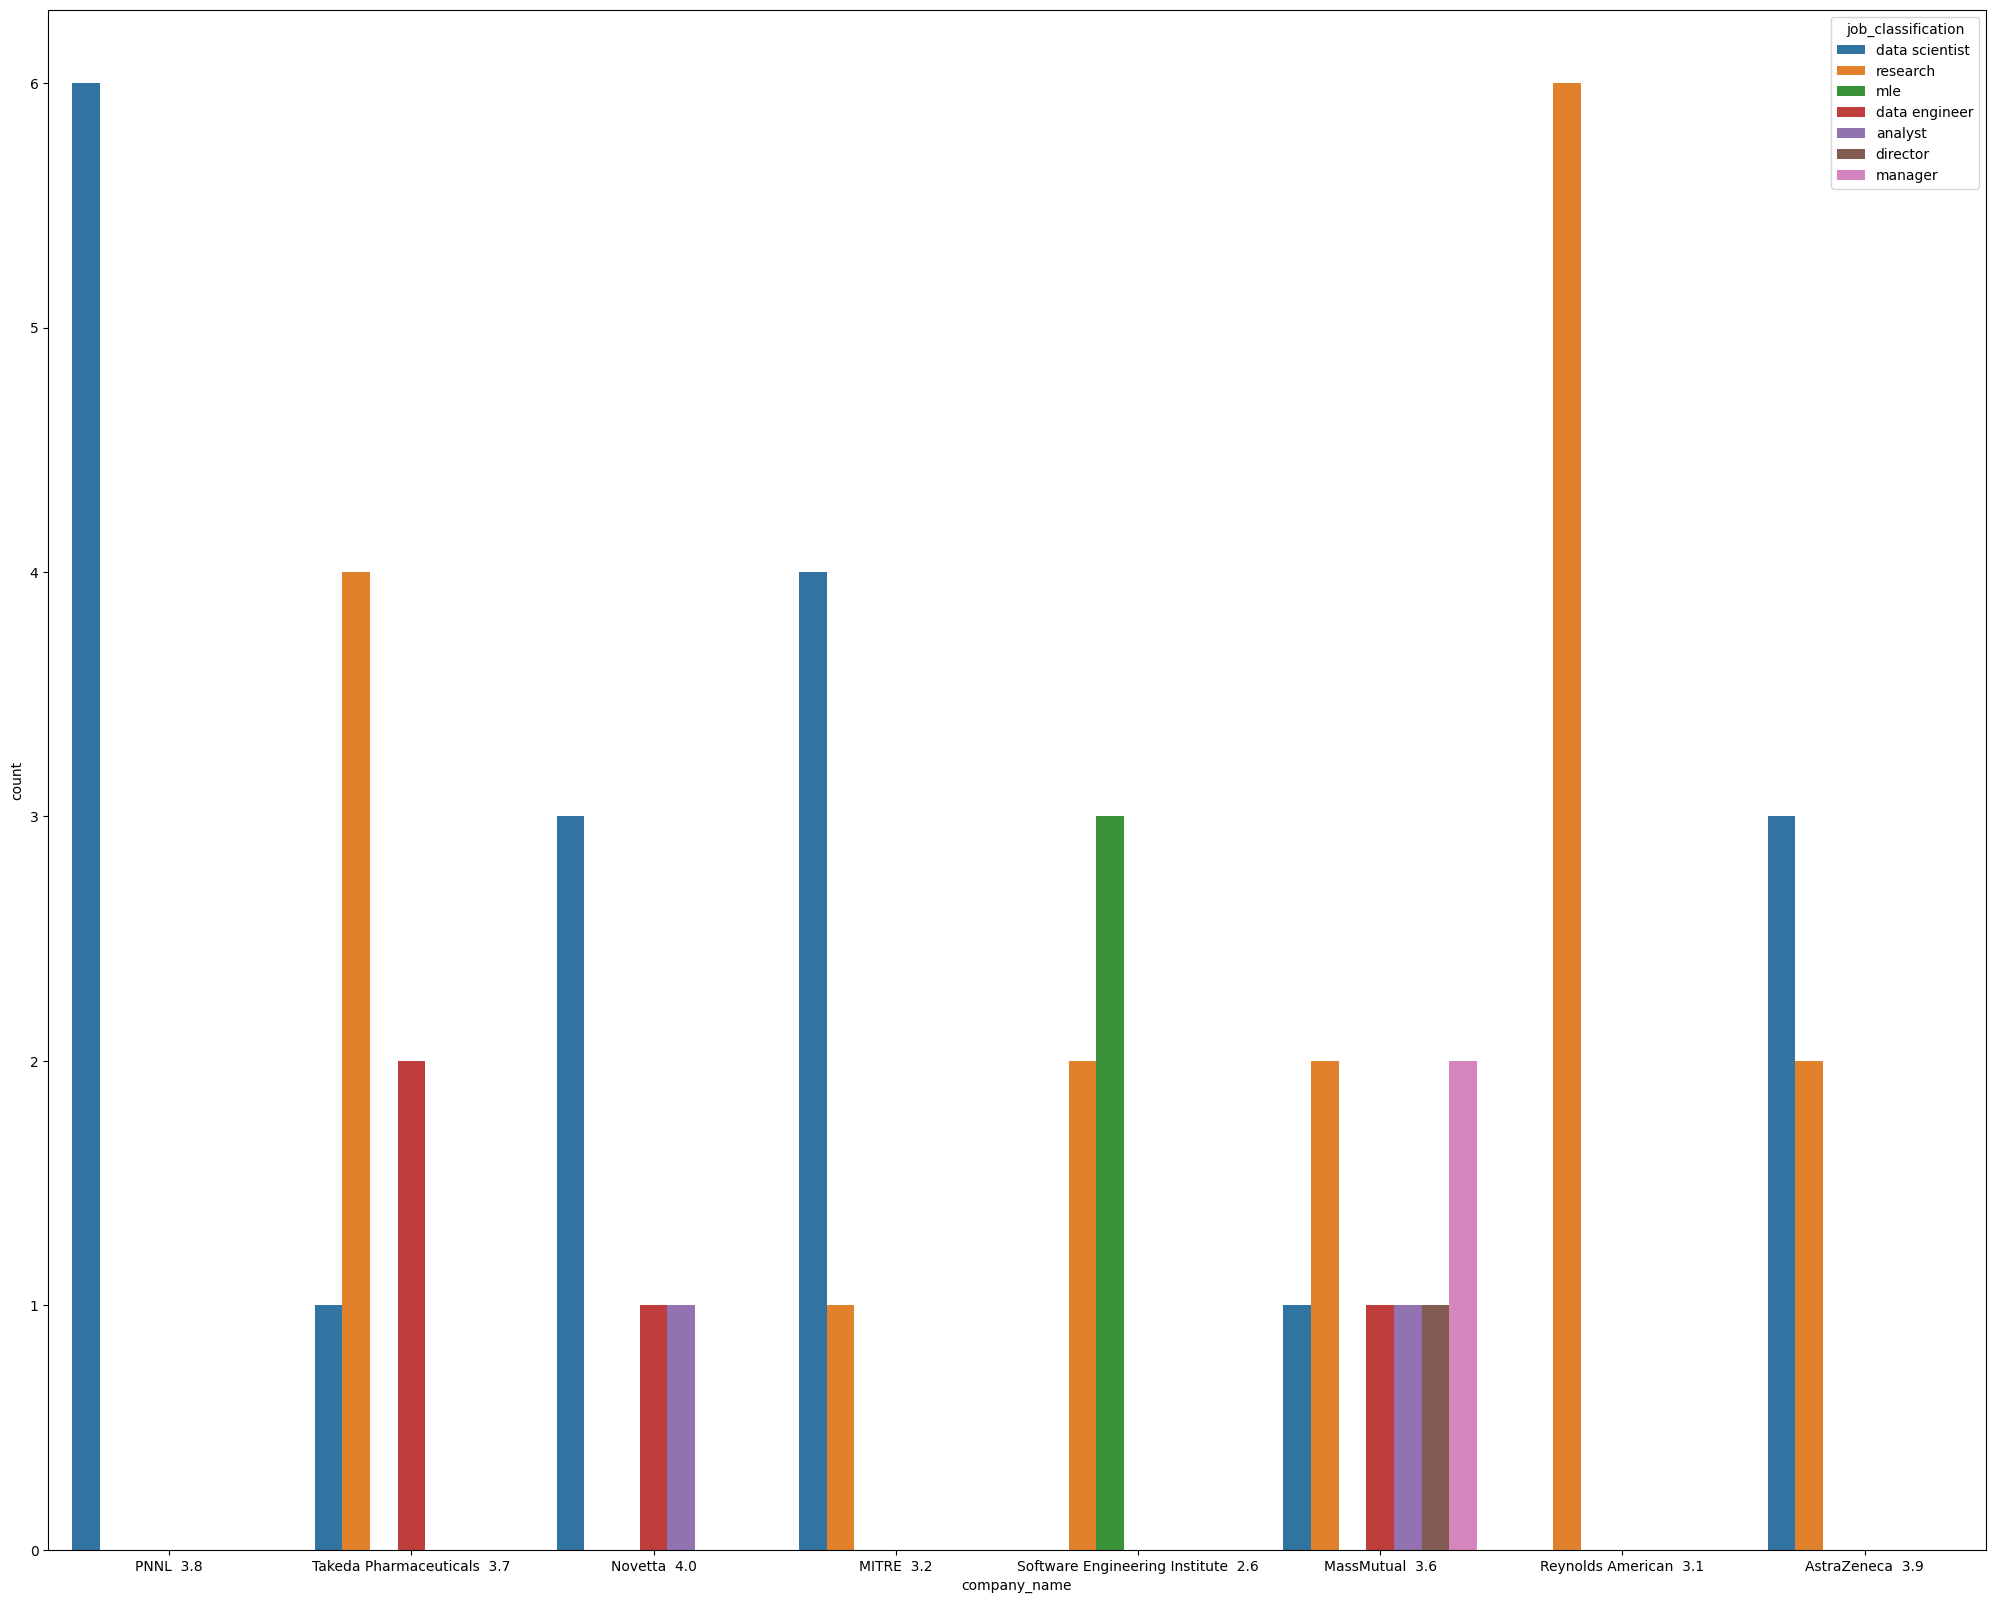

In [ ]:
# Barplot plot of average salary according the company name
fig, ax = plt.subplots(figsize=(25, 20))

company_filter_1 = df[(df['company_name'] == 'PNNL  3.8') | (df['company_name'] == 'Takeda Pharmaceuticals  3.7')
                      | (df['company_name'] ==  'MassMutual  3.6')
                      | (df['company_name'] == 'Reynolds American  3.1')
                      | (df['company_name'] ==  'Software Engineering Institute  2.6')
                      | (df['company_name'] == 'AstraZeneca  3.9' )
                      | (df['company_name'] == 'Novetta  4.0')
                      | (df['company_name'] == 'MITRE  3.2')]



sns.countplot(x = "company_name", hue="job_classification",data =company_filter_1)



## Data transformation

In [ ]:
Y = df['job_classification']

In [ ]:
X_1 = df[['company_name','city','type_of_ownership','industry']]

In [ ]:
X_1 = pd.get_dummies(Y_1)

In [ ]:
X_1

,"company_name_1-800-FLOWERS.COM, Inc. 2.8",company_name_1904labs 4.7,company_name_23andMe 4.0,company_name_7Park Data 3.8,company_name_<intent> 4.6,company_name_AVANADE 3.9,company_name_AXION Healthcare Solutions 3.6,company_name_Acceleron Pharma 4.4,company_name_Accuride International 3.6,company_name_Acuity Insurance 4.8,...,industry_Stock Exchanges,industry_TV Broadcast & Cable Networks,industry_Telecommunications Manufacturing,industry_Telecommunications Services,industry_Transportation Equipment Manufacturing,industry_Transportation Management,industry_Travel Agencies,industry_Trucking,industry_Video Games,industry_Wholesale
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
455,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = pd.concat([X_1,df['avg_salary']],axis = 1)

# Classification

In [ ]:
# Importing sklearn packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 42)

## Random forest

In [ ]:
# Initialize Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.5543478260869565
                precision    recall  f1-score   support

       analyst       0.53      0.59      0.56        17
 data engineer       0.25      0.13      0.17        15
data scientist       0.62      0.81      0.70        42
      director       0.00      0.00      0.00         1
       manager       0.00      0.00      0.00         4
           mle       0.00      0.00      0.00         2
      research       0.56      0.45      0.50        11

      accuracy                           0.55        92
     macro avg       0.28      0.28      0.28        92
  weighted avg       0.49      0.55      0.51        92



C:\Users\wilfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wilfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wilfr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,